In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import seaborn as sns
import pandas as pd

In [2]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [3]:
#Caricamento del grafo orientato

df_edge = pd.read_csv('twitch\DE\musae_DE_edges.csv')
edges = list(zip(df_edge["from"],df_edge["to"]))

In [4]:
df_target = pd.read_csv('twitch\DE\musae_DE_target.csv')
nodes = df_target['new_id']

In [5]:
graph = nx.DiGraph()
graph.add_edges_from(edges)
graph.add_nodes_from(nodes)
pos = nx.spring_layout(graph)

### Analisi descrittiva

In [6]:
print("NODES: ", len(graph.nodes))
print("EDGES: ", len(graph.edges))
print("DENSITY: ", round(nx.density(graph),3))
print("CLUSTERING AVERAGE: ", nx.average_clustering(graph))
#print("RAGGIO: ", nx.radius(graph))
#print("DIAMETRO: ", nx.diameter(graph))
#print("IS_CONNECTED: ", nx.is_connected(graph))

NODES:  9498
EDGES:  153138
DENSITY:  0.002
CLUSTERING AVERAGE:  0.10044286334661345


In [37]:
nx.clustering(graph)

{0: 0.2619047619047619,
 9206: 0.0036196226868541216,
 7787: 0.003276293530755361,
 2145: 0.006722334486950193,
 2684: 0.007933563035603853,
 7275: 0.007756000419243266,
 2498: 0.006459665411228869,
 5358: 0.008522364485667238,
 1: 0.08238636363636363,
 5506: 0.0977891156462585,
 1753: 0.12142857142857143,
 4361: 0.05271629778672032,
 2984: 0.08389423076923076,
 8978: 0.05194805194805195,
 2900: 0.06190476190476191,
 9151: 0.09191176470588236,
 3193: 0.08771929824561403,
 6160: 0.057932263814616754,
 8209: 0.07598870056497176,
 5682: 0.15454545454545454,
 4992: 0.23529411764705882,
 7668: 0.08139534883720931,
 2058: 0.05606060606060606,
 3164: 0.07692307692307693,
 2560: 0.10169265627082501,
 6009: 0.06675170068027211,
 8040: 0.034408602150537634,
 8873: 0.0484866294446077,
 1578: 0.0774390243902439,
 116: 0.027338331606763473,
 4611: 0.07931034482758621,
 3247: 0.05652173913043478,
 9407: 0.06095791001451379,
 3776: 0.04756871035940803,
 4575: 0.0380952380952381,
 4248: 0.075396825396

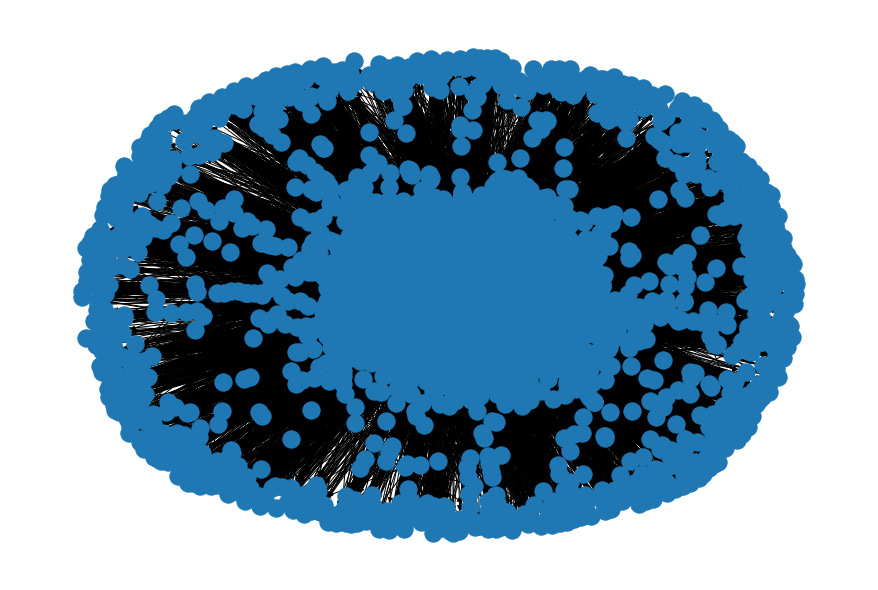

In [38]:
plt.figure(figsize=(12,8))
nx.draw(graph, pos)
plt.show()

Sample della rete

In [7]:
nodes = random.sample(graph.nodes(), 2000)
graph_sample = graph.subgraph(nodes)
pos_sample = nx.spring_layout(graph_sample)

C:\Users\mat98\AppData\Local\Temp\ipykernel_28880\834487171.py:1: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  nodes = random.sample(graph.nodes(), 2000)


In [8]:
print("NODES: ", len(graph_sample.nodes))
print("EDGES: ", len(graph_sample.edges))
print("DENSITY: ", round(nx.density(graph_sample),3))
print("CLUSTERING AVERAGE: ", nx.average_clustering(graph_sample))
#print("RAGGIO: ", nx.radius(graph))
#print("DIAMETRO: ", nx.diameter(graph))
#print("IS_CONNECTED: ", nx.is_connected(graph))

NODES:  2000
EDGES:  6497
DENSITY:  0.002
CLUSTERING AVERAGE:  0.0580354520879277


### Analisi della centralità

Degree Centrality

<AxesSubplot:>

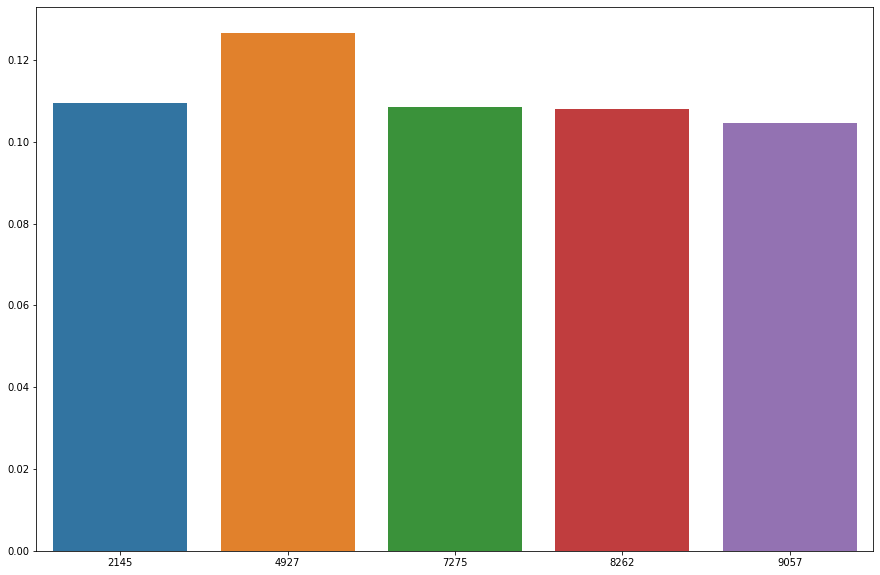

In [9]:
deg = nx.degree_centrality(graph_sample)
x=[]
y=[]
for key, value in deg.items():
    if value > 0.1:
        x.append(key)
        y.append(value)
plt.figure(figsize=(15,10))
sns.barplot(x=x, y=y)

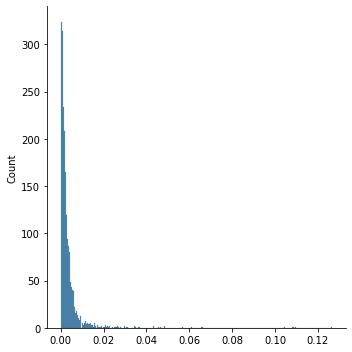

In [10]:
sns.displot(list(deg.values()))

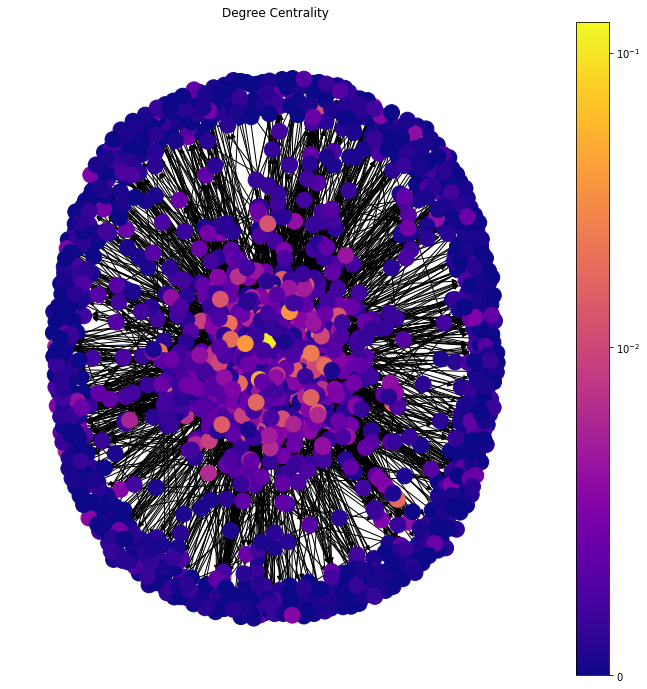

In [11]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph_sample)
draw(graph_sample, pos_sample, deg, 'Degree Centrality')

{8262: Text(0.029678747057914734, 0.03160049766302109, '8262'),
 9057: Text(0.0021305610425770283, -0.10693783313035965, '9057'),
 2145: Text(0.019664453342556953, 0.08612796664237976, '2145'),
 4927: Text(-0.05473574250936508, -0.0022367960773408413, '4927'),
 7275: Text(-0.019702134653925896, 0.03875017538666725, '7275')}

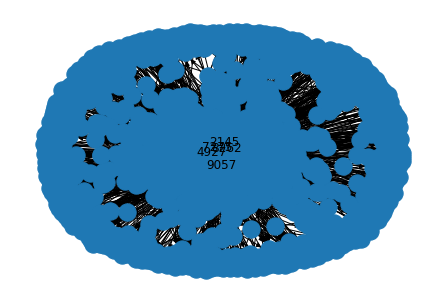

In [12]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in deg.items():
    if value > 0.1: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph_sample)
nx.draw(graph_sample, pos_sample, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph_sample, pos_sample, labels)

Betweenness Centrality

<AxesSubplot:>

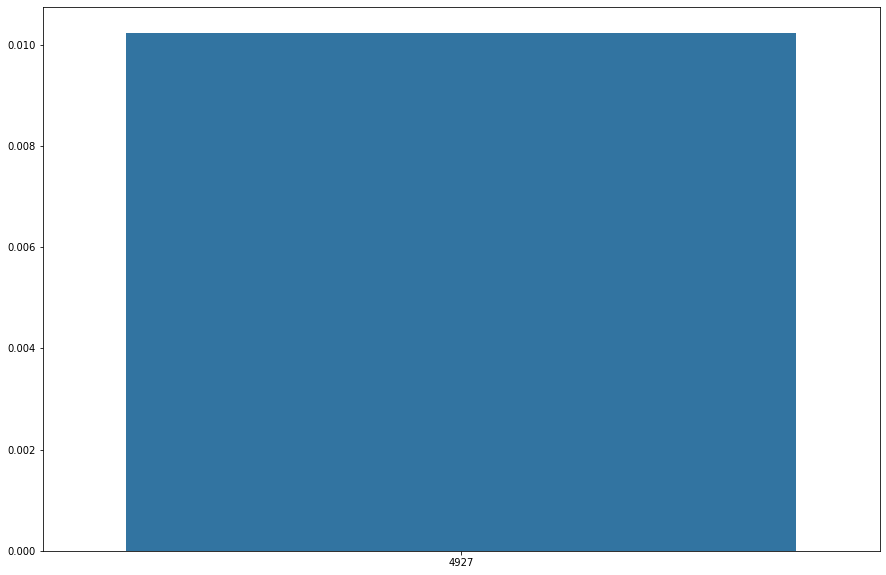

In [13]:
bet = nx.betweenness_centrality(graph_sample)
x=[]
y=[]
for key, value in bet.items():
    if value > 0.01:
        x.append(key)
        y.append(value)
plt.figure(figsize=(15,10))
sns.barplot(x=x, y=y)

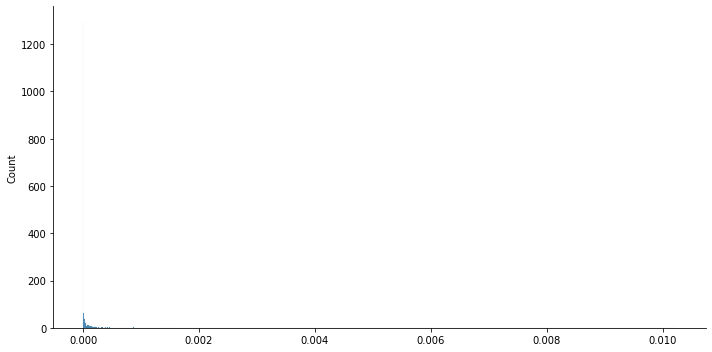

In [14]:
sns.displot(list(bet.values()), aspect=2)

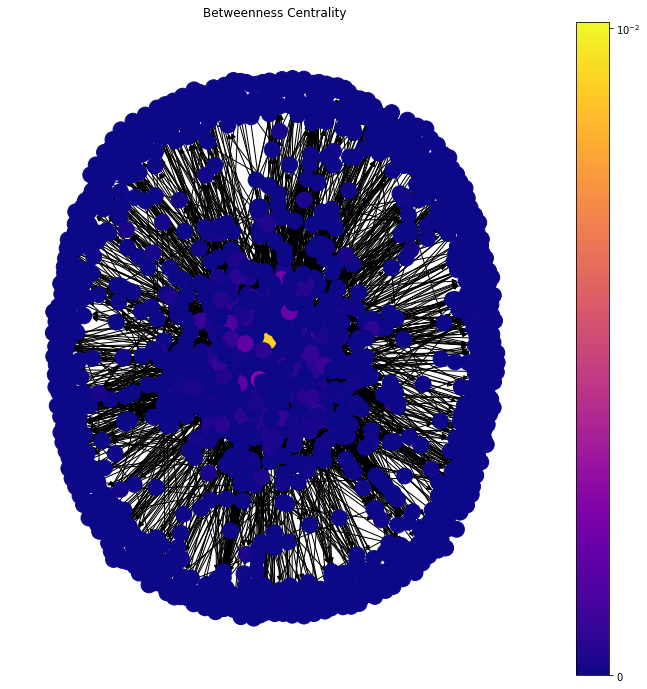

In [15]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph_sample)
draw(graph_sample, pos_sample, bet, 'Betweenness Centrality')

In [16]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in bet.items():
    if value > 0.01: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph_sample)
nx.draw(graph_sample, pos_sample, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph_sample, pos_sample, labels)

: 

: 

Closeness Centrality

<AxesSubplot:>

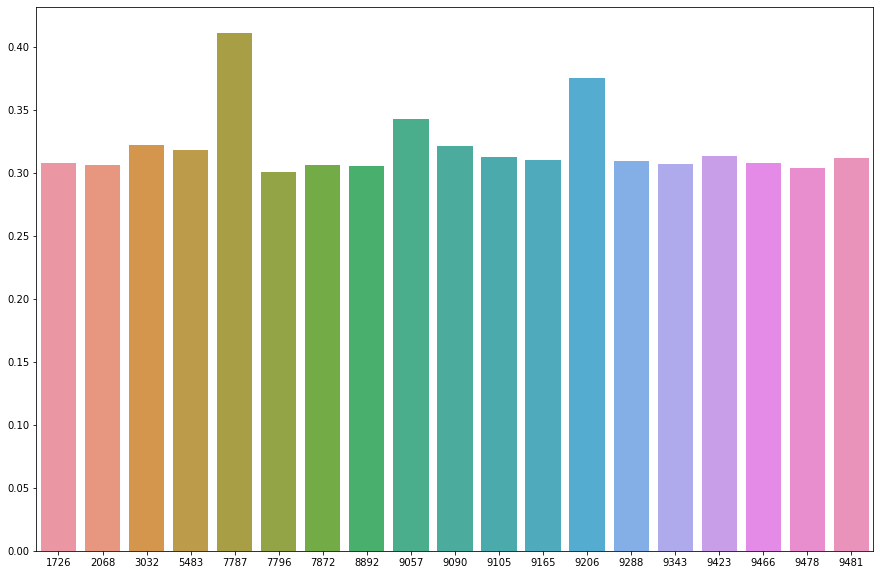

In [ ]:
clos = nx.closeness_centrality(graph_sample)
x=[]
y=[]
for key, value in clos.items():
    if value > 0.3:
        x.append(key)
        y.append(value)
plt.figure(figsize=(15,10))
sns.barplot(x=x, y=y)

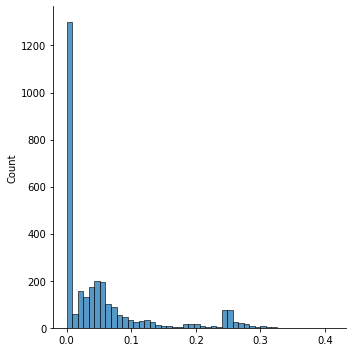

In [ ]:
sns.displot(list(clos.values()))

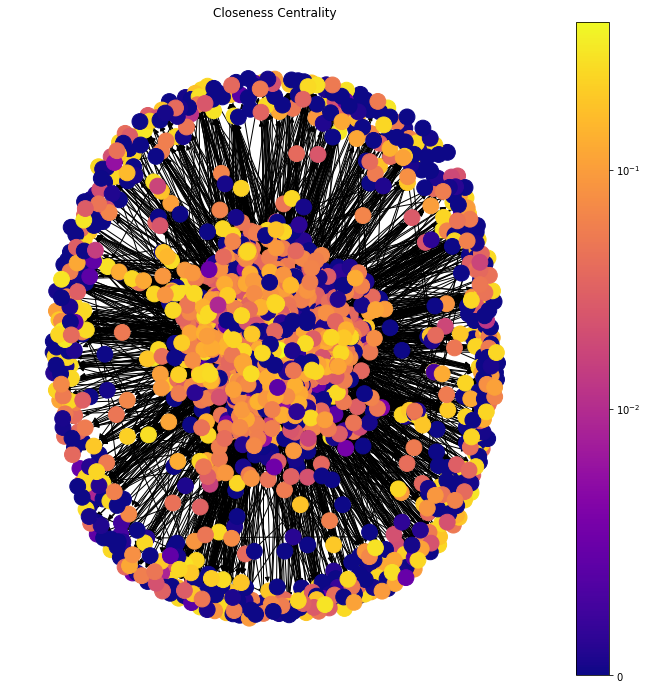

In [ ]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph_sample)
draw(graph_sample, pos_sample, clos, 'Closeness Centrality')

In [ ]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in clos.items():
    if value > 0.3: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

Eigenvector Centrality

<AxesSubplot:>

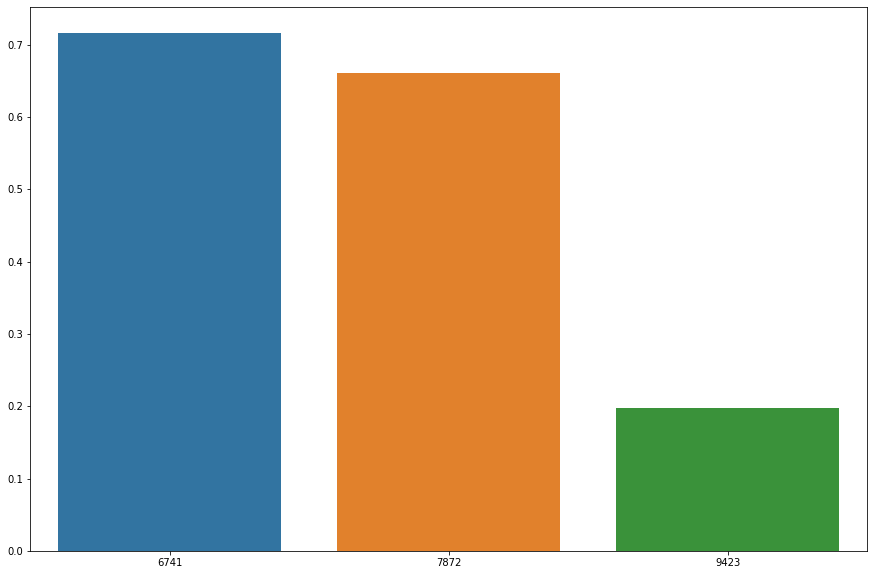

In [ ]:
eigv = nx.eigenvector_centrality(graph_sample, max_iter=400)
x=[]
y=[]
for key, value in eigv.items():
    if value > 0.1:
        x.append(key)
        y.append(value)
plt.figure(figsize=(15,10))
sns.barplot(x=x, y=y)

C:\Users\mat98\AppData\Local\Temp\ipykernel_3288\2072448624.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(list(eigv.values()), kde=False)


<AxesSubplot:>

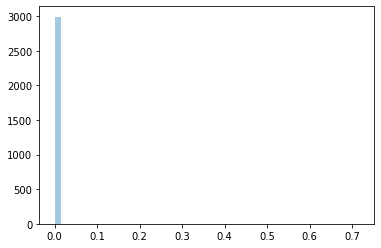

In [ ]:
sns.distplot(list(eigv.values()), kde=False)

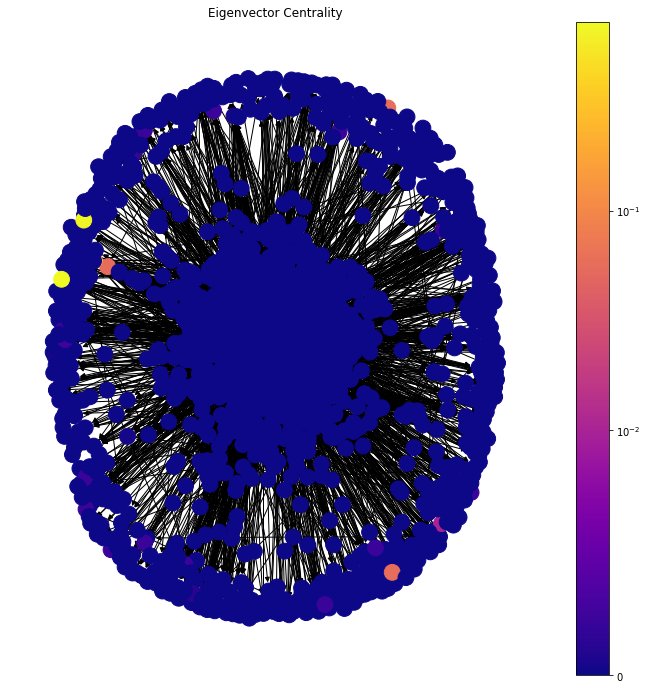

In [ ]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph_sample)
draw(graph_sample, pos_sample, eigv, 'Eigenvector Centrality')

In [ ]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in eigv.items():
    if value > 0.1: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

PageRank

<AxesSubplot:>

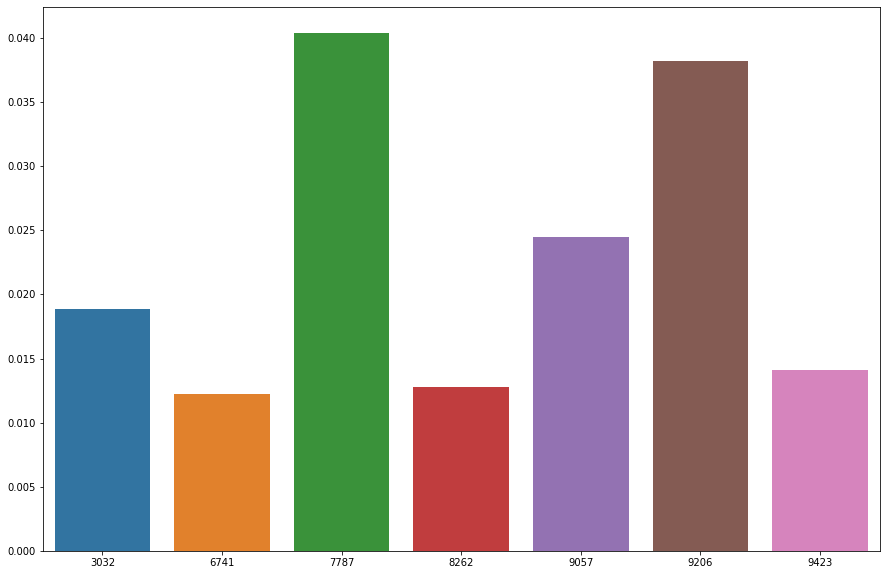

In [ ]:
pager = nx.pagerank(graph_sample, alpha=0.85) #l'alpha è chiamato damping factor
x=[]
y=[]
for key, value in pager.items():
    if value > 0.01:
        x.append(key)
        y.append(value)
plt.figure(figsize=(15,10))
sns.barplot(x=x, y=y)

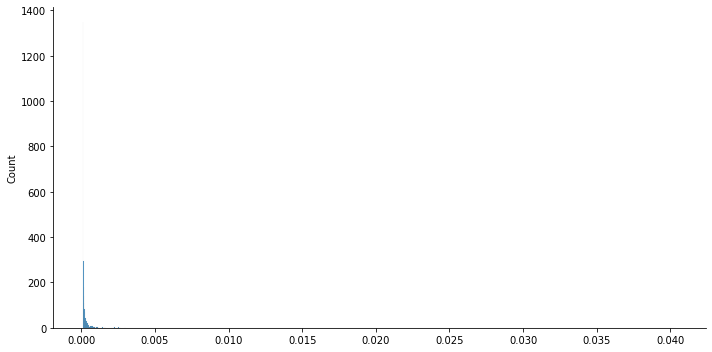

In [ ]:
sns.displot(list(pager.values()), kde=False, aspect=2)

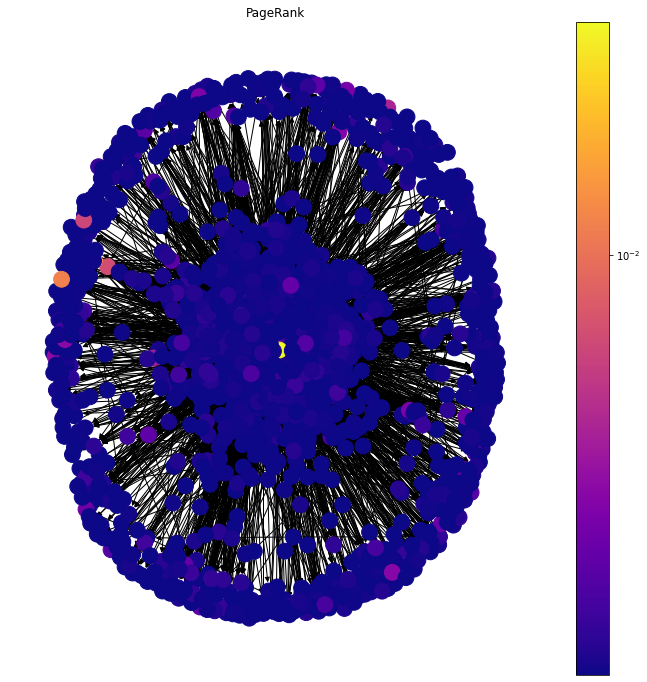

In [ ]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph_sample)
draw(graph_sample, pos_sample, pager, 'PageRank')

In [ ]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in pager.items():
    if value > 0.01: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

### Analisi delle strutture

Communites

In [ ]:
# BONUS
from networkx.algorithms import community

communities = community.greedy_modularity_communities(graph_sample)
communities

[frozenset({17,
            36,
            41,
            54,
            59,
            66,
            68,
            72,
            79,
            104,
            112,
            126,
            138,
            142,
            178,
            206,
            221,
            234,
            236,
            244,
            273,
            296,
            301,
            315,
            337,
            344,
            381,
            382,
            383,
            385,
            390,
            400,
            419,
            422,
            430,
            449,
            456,
            478,
            515,
            521,
            526,
            535,
            539,
            540,
            566,
            573,
            575,
            598,
            622,
            629,
            640,
            648,
            657,
            693,
            697,
            701,
            736,
            754,
            756,
      

In [ ]:
len(communities)

232